In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
from tensorflow.keras.utils import to_categorical
import pandas as pd
# Load Data 
with open('Nhandiencamxuc.pickle', 'rb') as f:
  (x_train, y_train),(x_test, y_test) = pickle.load(f)

# Reshape Data
x_pre1 = x_train
x_pre2 = x_test
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train,4)
y_test = to_categorical(y_test,4)
y_train.shape

(80, 4)

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape = (150,150,3,)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(4,activation='softmax'))
model.summary()
opt = 'adam'
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])
history = model.fit(x_train,y_train, epochs=20, verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 18, 18, 64)      

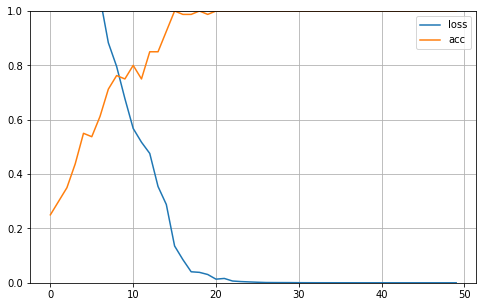

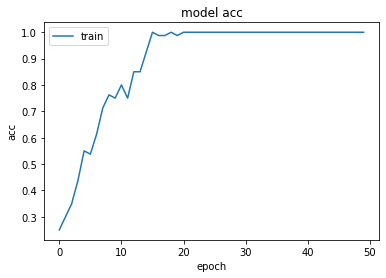

In [13]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
plt.plot(history.history['acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

(150, 150, 3)
[1]


'Dự đoán là Hạnh Phúc'

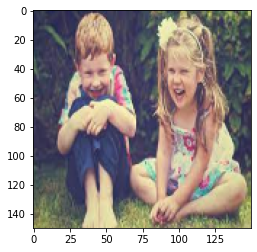

In [16]:
test = 20
plt.imshow(cv2.cvtColor(x_pre1[test], cv2.COLOR_BGR2RGB))
print(x_pre1[test].shape)
img = x_pre1[test].reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Dự đoán là Ngạc Nhiên', 'Dự đoán là Hạnh Phúc', 'Dự đoán là Giận dữ','Dự đoán là Sợ Hãi']
Label[pred[0]]

(150, 150, 3)
[2]


'Dự đoán là Giận dữ'

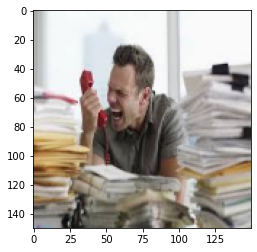

In [20]:
test = 50
plt.imshow(cv2.cvtColor(x_pre1[test], cv2.COLOR_BGR2RGB))
print(x_pre1[test].shape)
img = x_pre1[test].reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Dự đoán là Ngạc Nhiên', 'Dự đoán là Hạnh Phúc', 'Dự đoán là Giận dữ','Dự đoán là Sợ Hãi']
Label[pred[0]]


(150, 150, 3)
[0]


'Dự đoán là Ngạc Nhiên'

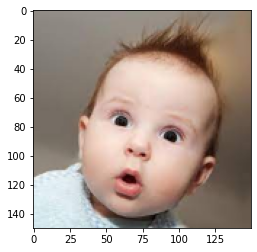

In [22]:
test = 1
plt.imshow(cv2.cvtColor(x_pre1[test], cv2.COLOR_BGR2RGB))
print(x_pre1[test].shape)
img = x_pre1[test].reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Dự đoán là Ngạc Nhiên', 'Dự đoán là Hạnh Phúc', 'Dự đoán là Giận dữ','Dự đoán là Sợ Hãi']
Label[pred[0]]

(150, 150, 3)
[3]


'Dự đoán là Sợ Hãi'

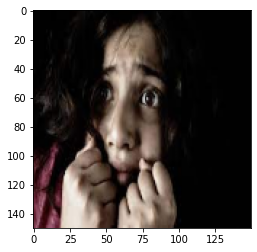

In [24]:
test = 60
plt.imshow(cv2.cvtColor(x_pre1[test], cv2.COLOR_BGR2RGB))
print(x_pre1[test].shape)
img = x_pre1[test].reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Dự đoán là Ngạc Nhiên', 'Dự đoán là Hạnh Phúc', 'Dự đoán là Giận dữ','Dự đoán là Sợ Hãi']
Label[pred[0]]

In [ ]:
#https://drive.google.com/file/d/1AYUNcB8mYH7MFwjr6YxhAvGxdTB0fZ9w/view?usp=sharing